In [10]:
import numpy as np
import pandas as pd
import seaborn as sns 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
avocado=pd.read_csv("C:/Users/shadab ahmad khan/OneDrive/Desktop/Algorithms/Kaggle/avocado/avocado.csv")

In [5]:
avocado.shape

(18249, 14)

In [7]:
avocado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [8]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [14]:
print(avocado['type'].value_counts())
print("---------------------------------------------------")
print(avocado['year'].value_counts())

conventional    9126
organic         9123
Name: type, dtype: int64
---------------------------------------------------
2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


In [19]:
#Let's remove first column Unnamed from dataset
avocado.drop(['Unnamed: 0'],inplace=True,axis=1)

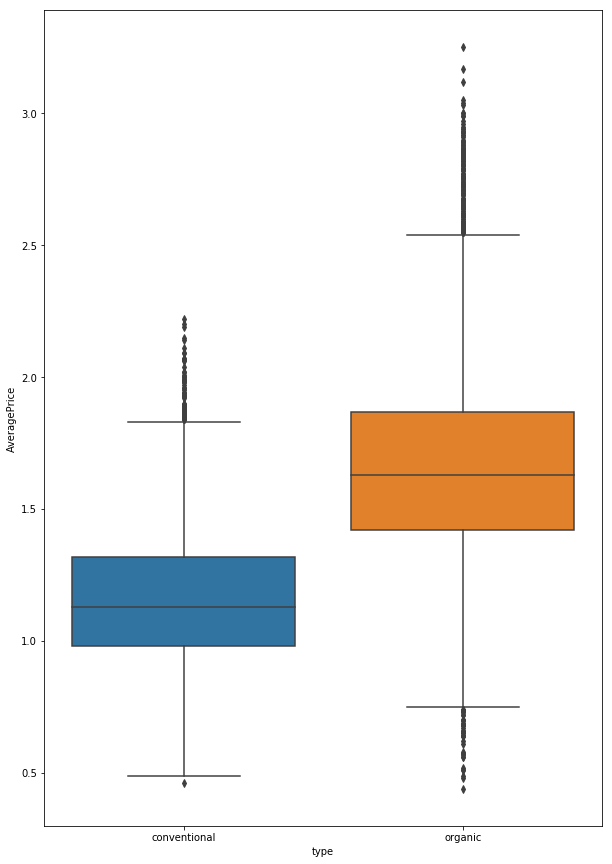

In [30]:
plt.figure(figsize=[10,15])
sns.boxplot(x='type',y='AveragePrice',data=avocado)

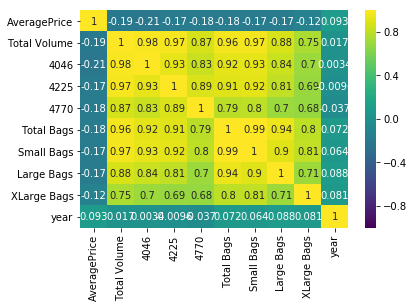

In [36]:
sns.heatmap(avocado.corr(), vmin=-1, vmax=1, cmap='viridis', annot=True)

In [31]:
avocado['region'].value_counts()

BuffaloRochester       338
Pittsburgh             338
CincinnatiDayton       338
Orlando                338
HartfordSpringfield    338
Tampa                  338
GreatLakes             338
LasVegas               338
NewYork                338
BaltimoreWashington    338
Albany                 338
Nashville              338
SanDiego               338
HarrisburgScranton     338
SouthCentral           338
LosAngeles             338
RaleighGreensboro      338
Roanoke                338
StLouis                338
Philadelphia           338
Atlanta                338
Southeast              338
Sacramento             338
Chicago                338
Louisville             338
California             338
TotalUS                338
NorthernNewEngland     338
West                   338
MiamiFtLauderdale      338
DallasFtWorth          338
GrandRapids            338
Boston                 338
SanFrancisco           338
Spokane                338
Plains                 338
Portland               338
C

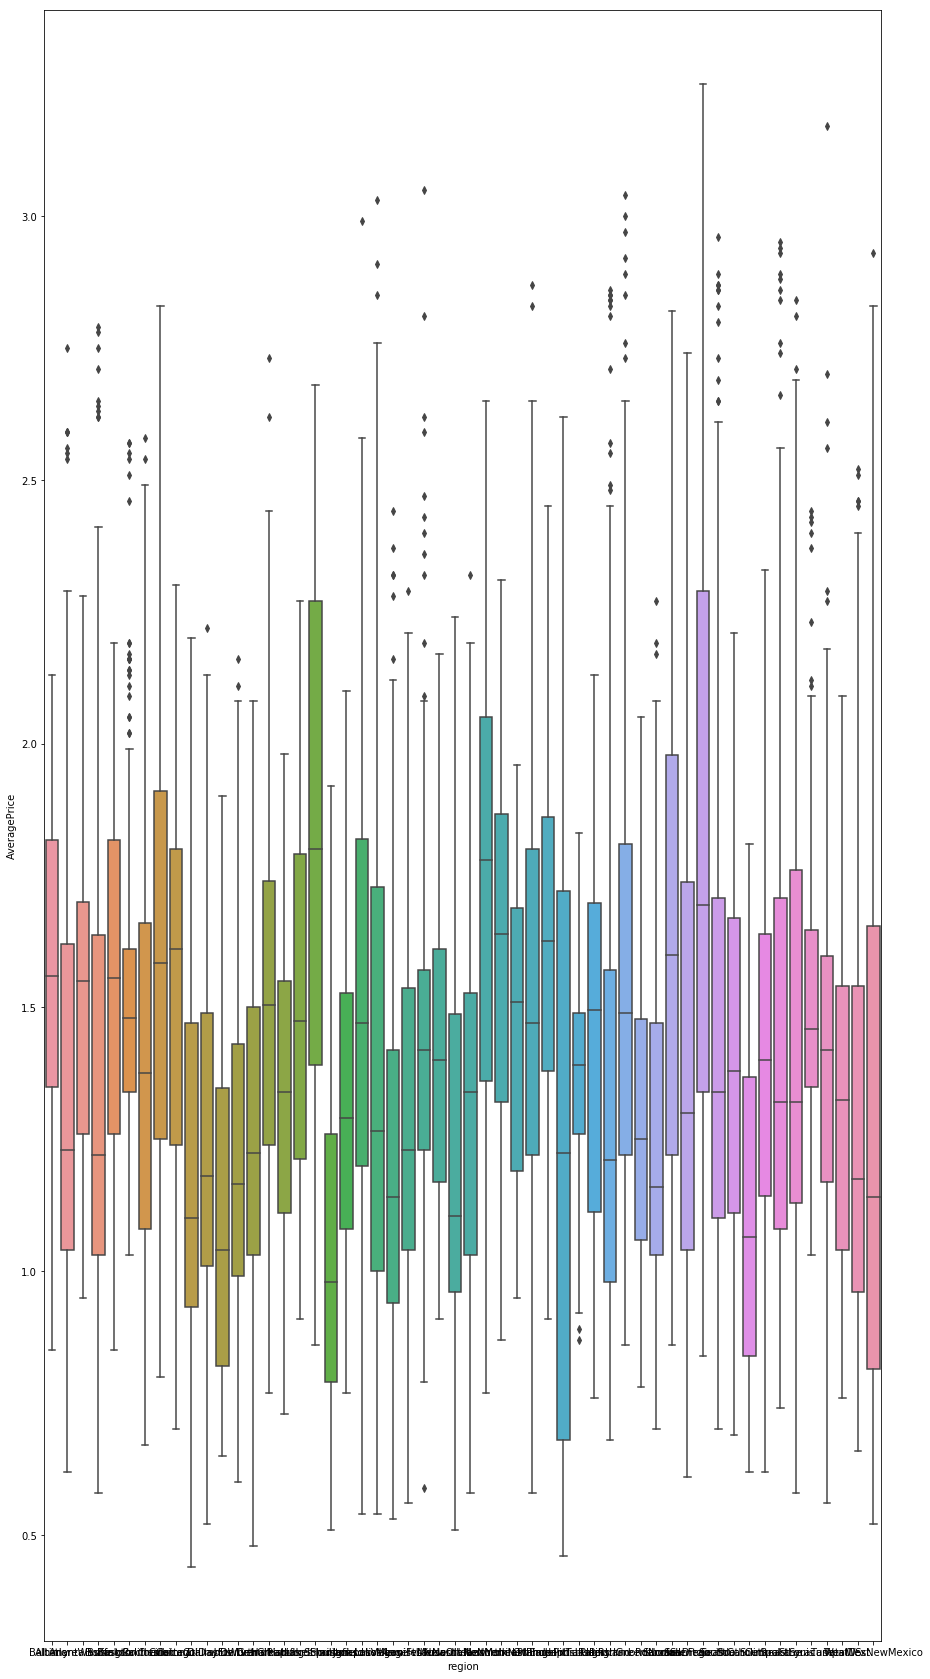

In [33]:
plt.figure(figsize=[15,30])
sns.boxplot(x='region',y='AveragePrice',data=avocado)

In [37]:
#checking for missing values and duplicated values
avocado.isnull().any()

Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [38]:
avocado.duplicated().any()

False

In [39]:
#let's get months from date and accordingly set up season as per range of months
avocado['Date']=pd.to_datetime(avocado['Date'])

In [40]:
avocado['Month']=avocado['Date'].dt.month

In [41]:
avocado['Month'].value_counts()

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64

In [46]:
conditions = [(avocado['Month'].between(3,5,inclusive=True)),
           (avocado['Month'].between(6,8,inclusive=True)),
           (avocado['Month'].between(9,11,inclusive=True)),
           (avocado['Month'].between(12,2,inclusive=True))]

values = [0,1,2,3]

In [47]:
avocado['seasons'] = np.select(conditions, values)

In [49]:
avocado=avocado.drop(['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags'],axis=1)

In [50]:
avocado.head()

,Date,AveragePrice,type,year,region,Month,seasons
0,2015-12-27,1.33,conventional,2015,Albany,12,0
1,2015-12-20,1.35,conventional,2015,Albany,12,0
2,2015-12-13,0.93,conventional,2015,Albany,12,0
3,2015-12-06,1.08,conventional,2015,Albany,12,0
4,2015-11-29,1.28,conventional,2015,Albany,11,2


In [51]:
#Let's encode the feature
avocado['type']=avocado['type'].map({'conventional':1,'organic':0})

In [53]:
avocado1=pd.get_dummies(data=avocado,columns=['region'])

,Date,AveragePrice,type,year,Month,seasons,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2015-12-27,1.33,1,2015,12,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-12-20,1.35,1,2015,12,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015-12-13,0.93,1,2015,12,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015-12-06,1.08,1,2015,12,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015-11-29,1.28,1,2015,11,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
y=avocado1['AveragePrice']
X=avocado1.drop(['Date','AveragePrice'],axis=1)

In [68]:
#let's split in test and training
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

pipe0 = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe0.fit(X_train, y_train)
y_pred0 = pipe0.predict(X_test)
r2_score(y_test, y_pred0)
#pipe0.fit(X_train, y_train)
#y_pred0 = pipe0.predict(X_test)
#r2_score(y_test, y_pred0)

0.6184526599185586

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

pipe0 = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor())])
pipe0.fit(X_train, y_train)
y_pred0 = pipe0.predict(X_test)
r2_score(y_test, y_pred0)
#pipe0.fit(X_train, y_train)
#y_pred0 = pipe0.predict(X_test)
#r2_score(y_test, y_pred0)

0.8429067540141486

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
algo=['lr','rf','xgb','tree']
algo_cls={'lr':LinearRegression(),'rf':RandomForestRegressor(),'xgb':XGBRegressor(),'tree':DecisionTreeRegressor()}
model_score={}
for i in range(len(algo)):
    model=Pipeline([('scaler', StandardScaler()),(algo[i], algo_cls[algo[i]])])
    model.fit(X_train, y_train)
    y_pred0 = model.predict(X_test)
    score=r2_score(y_test, y_pred0)
    model_score[algo[i]]=score
model_score

{'lr': 0.6184526599185586,
 'rf': 0.8436160817531604,
 'xgb': 0.839169425261617,
 'tree': 0.8404824150956669}

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

model=RandomForestRegressor()
r2score = cross_val_score(model, X, y, scoring='r2', cv =5)
print(r2score)

[-0.25547691  0.51809954  0.47330604 -0.02310869 -0.01890127]


In [60]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']